In [1]:
from DISPLAY import plot_changepoint_comparison, summarize_and_plot_total_cps, boxplot_cps

In [2]:
DIRS_PARA_COMPARAR = {
    'Agregação Mean': 'changepoints/mean',
    'Agregação Bayes': 'changepoints/multiplicativa',
    'Agregação Log (D_KL média)': 'changepoints/logaritmica_KL',
    'Agregação Log (H)': 'changepoints/logaritmica_H',
    'Pelt': 'changepoints/pelt'
}

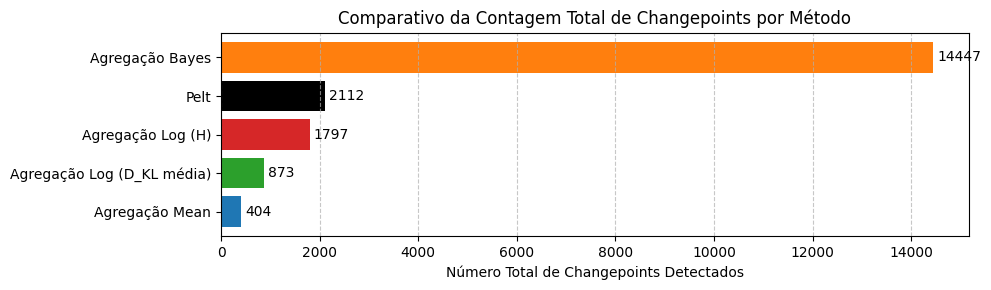

In [3]:
summarize_and_plot_total_cps(DIRS_PARA_COMPARAR)

In [4]:
VARIABLES = ['throughput_download', 'throughput_upload', 'rtt_download', 'rtt_upload', 'packet_loss']

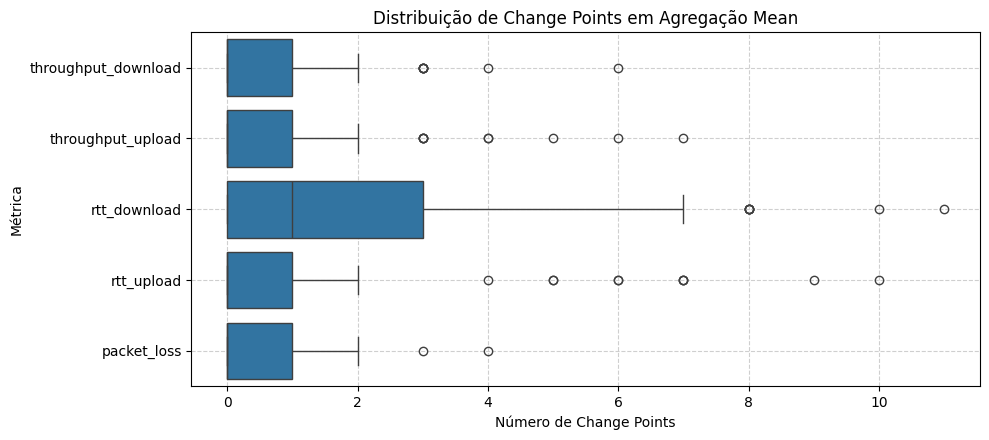

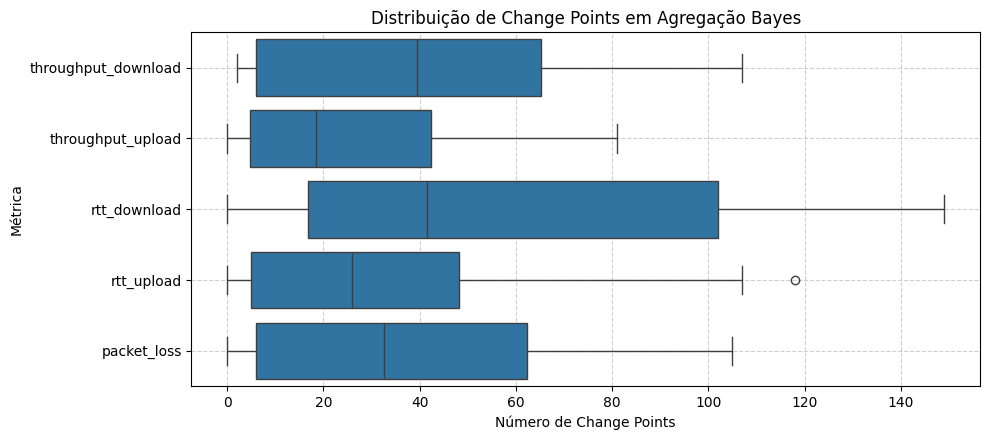

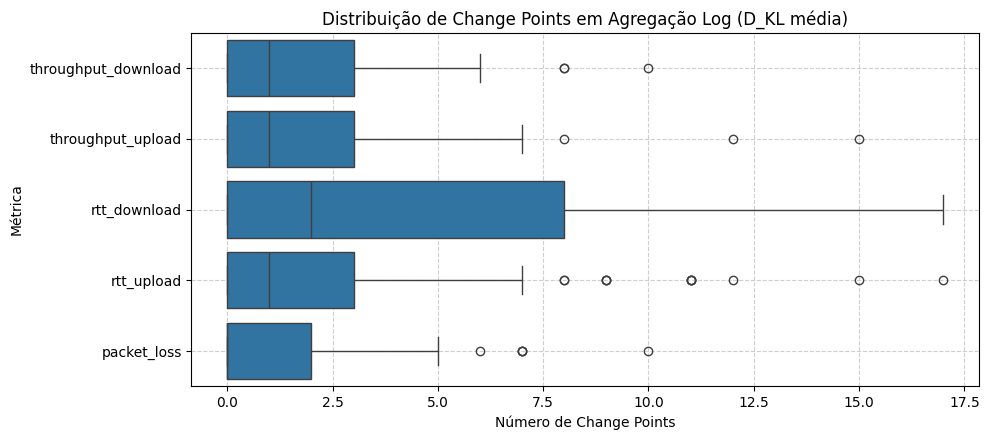

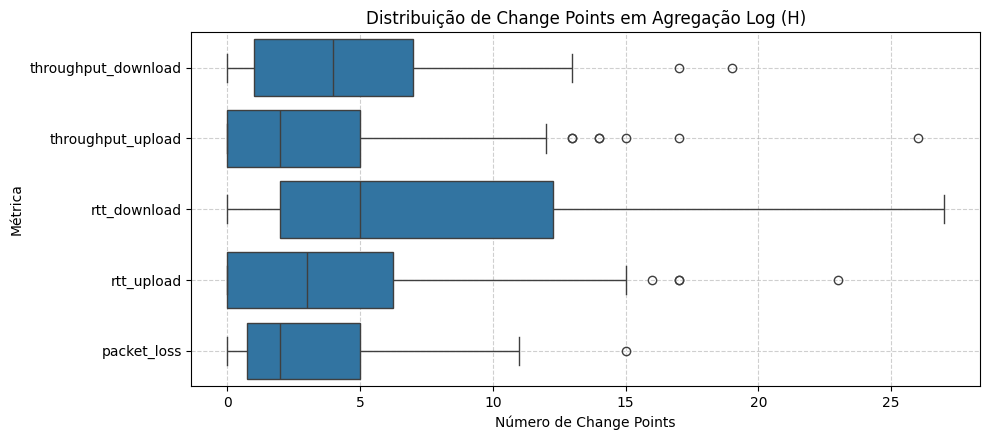

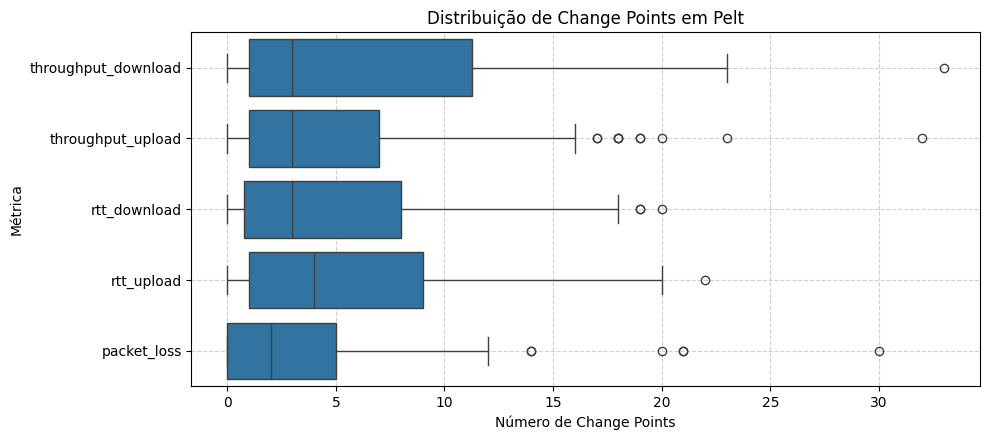

In [5]:
for name, dir_path in DIRS_PARA_COMPARAR.items():
    boxplot_cps(dir_path, VARIABLES, name)

In [6]:
import pandas as pd
df = pd.read_csv('datasets/devices.csv')
CLIENTS = df['owner'].dropna().unique().tolist()
df = pd.read_csv('datasets/servers.csv')
SERVERS = df['name'].dropna().unique().tolist()

In [7]:
# selecionar n arquivos aleatórios na pasta do métodos escolhido
def selecionar_arquivos_aleatorios(diretorio, n):
    import os
    import random
    arquivos = os.listdir(diretorio)
    arquivos_ramdom = random.sample(arquivos, n)
    pares_cliente_servidor = [(arquivo.split('_')[0], arquivo.split('_')[1].replace('.csv','')) for arquivo in arquivos_ramdom]
    return pares_cliente_servidor

Figura salva em: imgs_comparativo\COMP_Gigalink-LUMA_gru03_throughput_download.png


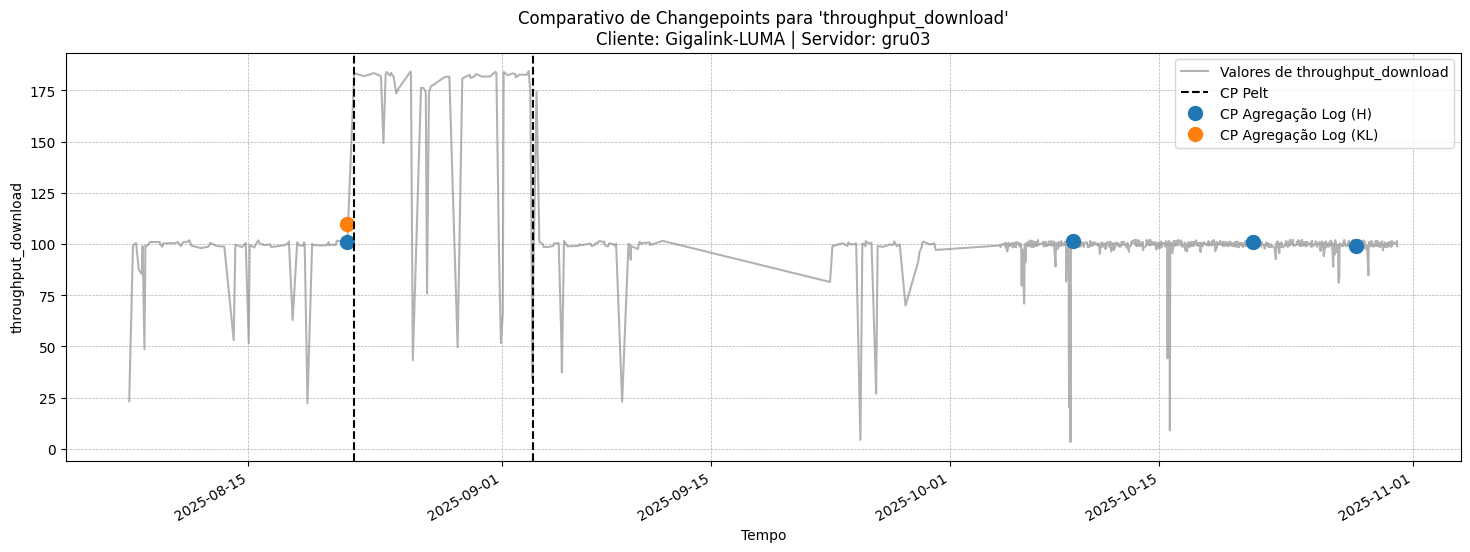

Figura salva em: imgs_comparativo\COMP_Curi_gru03_throughput_download.png


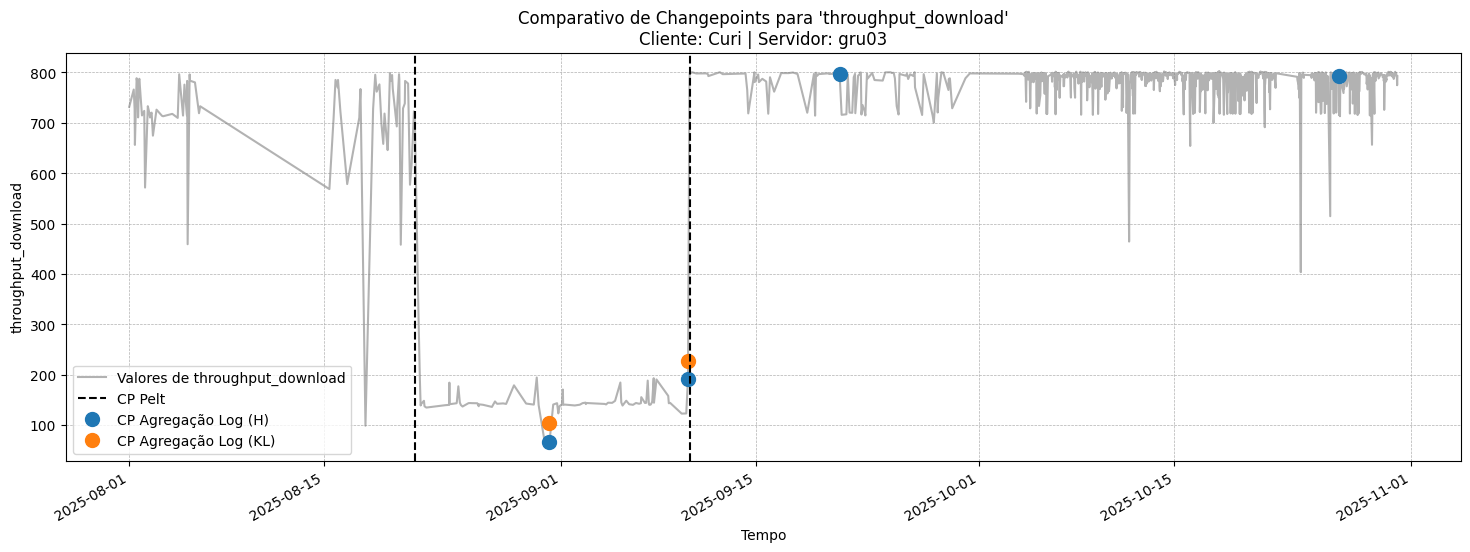

Figura salva em: imgs_comparativo\COMP_Gigalink-BSC_gru02_throughput_download.png


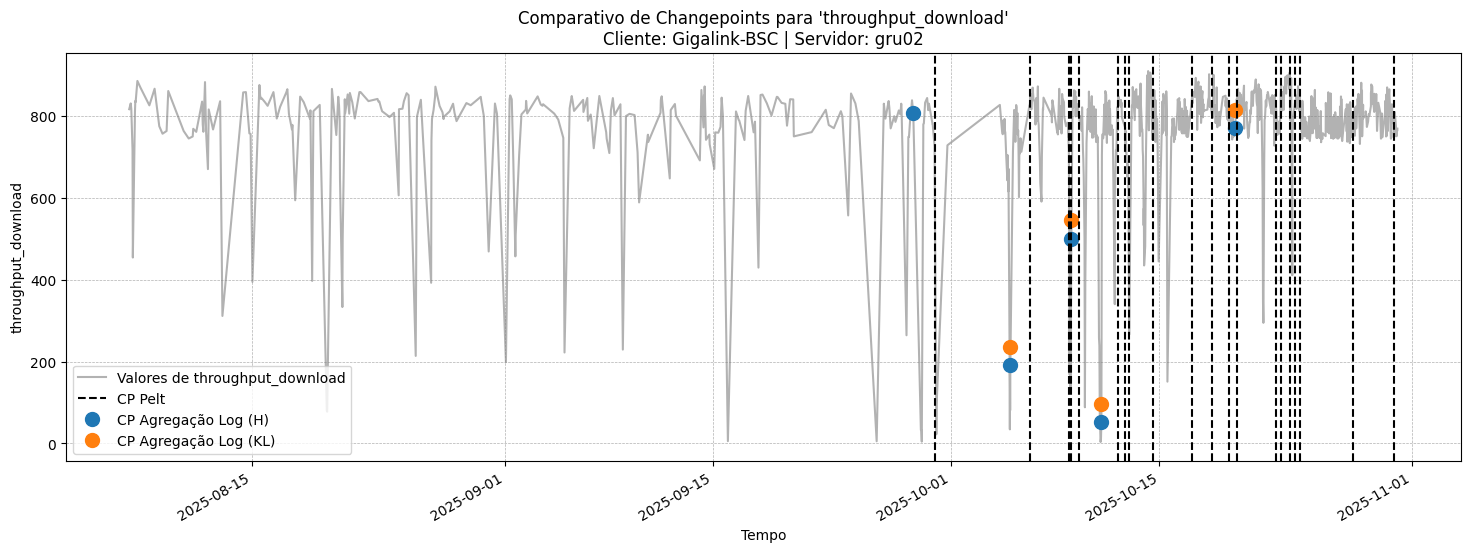

Figura salva em: imgs_comparativo\COMP_Gigalink-RIOS_google-cloud-SP_throughput_download.png


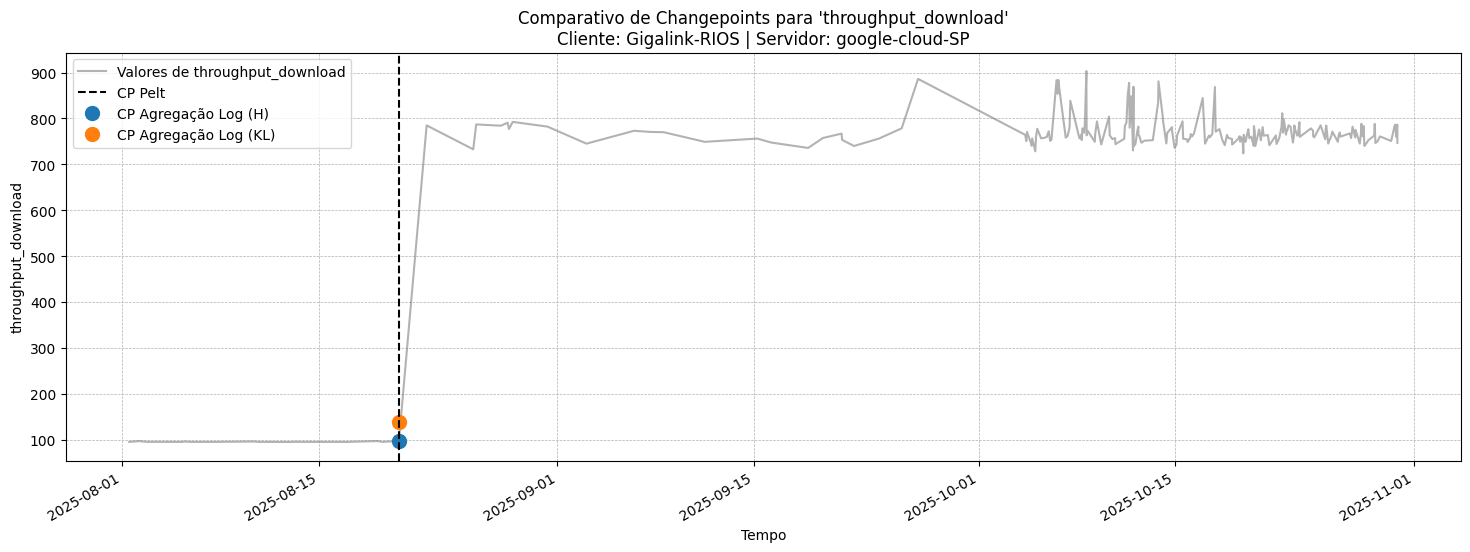

Figura salva em: imgs_comparativo\COMP_teste_RNP-RJ_throughput_download.png


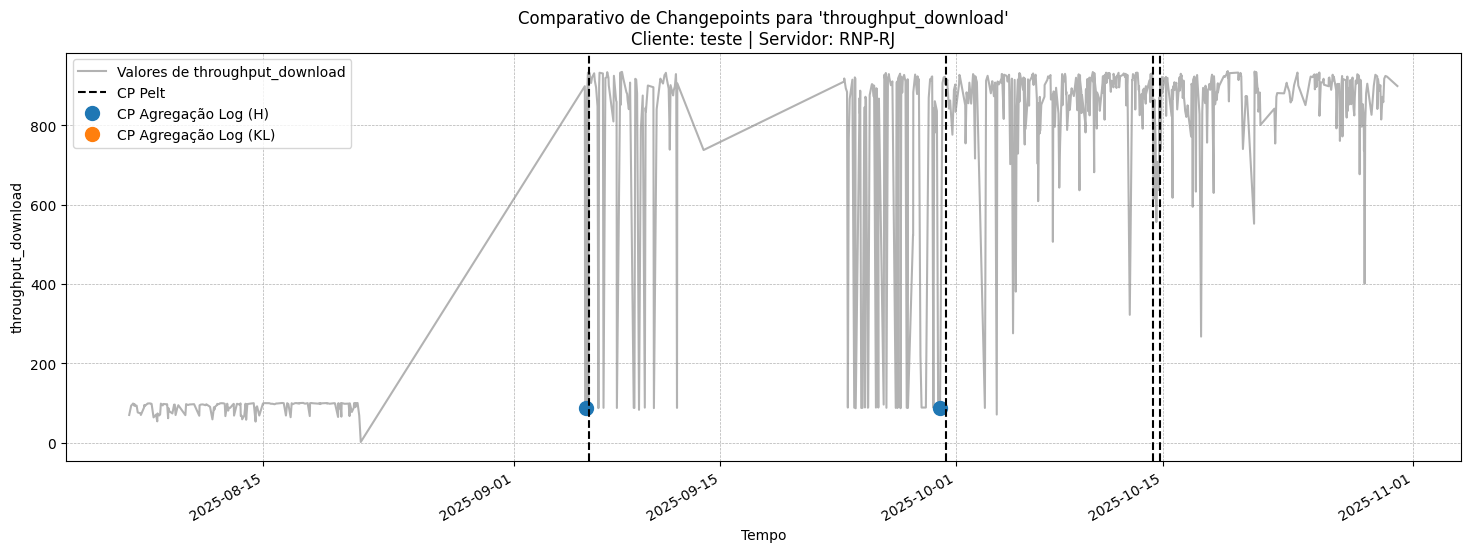

Figura salva em: imgs_comparativo\COMP_teste_google-cloud-SP_throughput_download.png


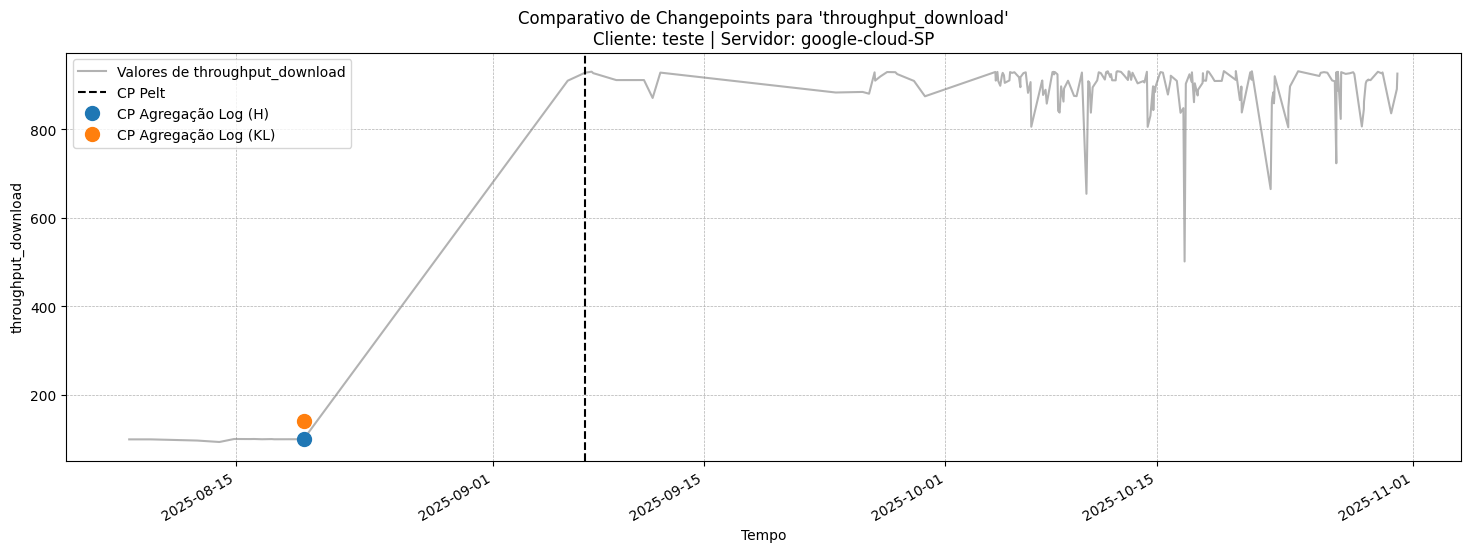

Figura salva em: imgs_comparativo\COMP_Gigalink-NOF_gru02_throughput_download.png


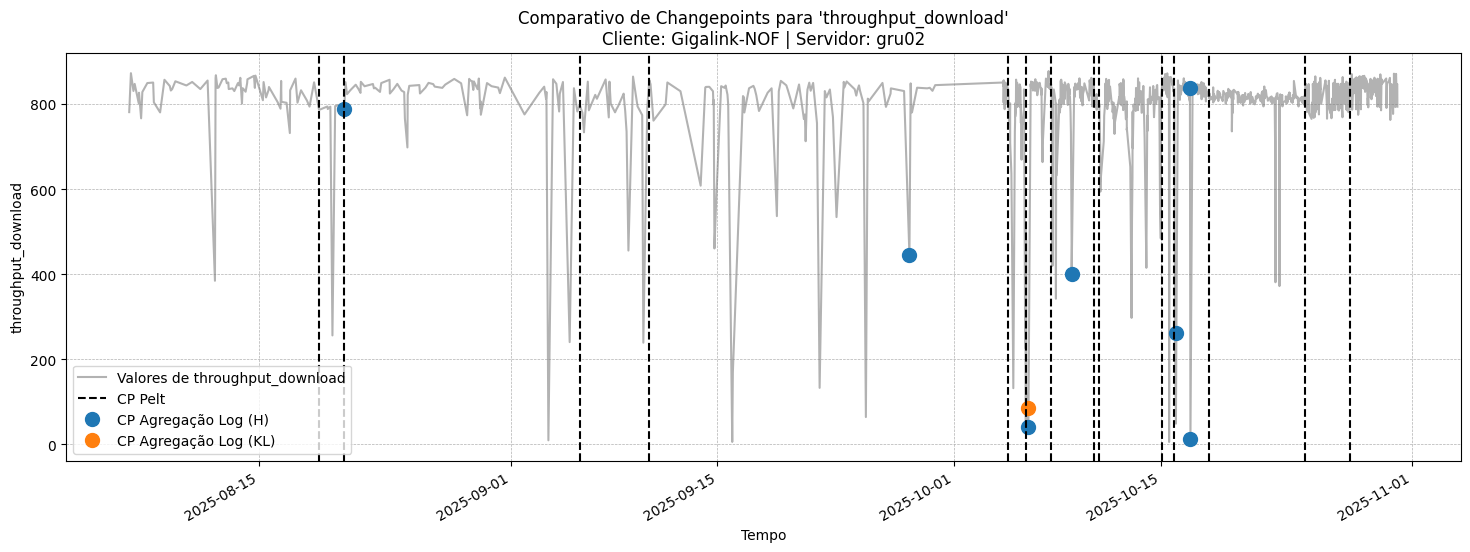

Figura salva em: imgs_comparativo\COMP_Curi_gru02_throughput_download.png


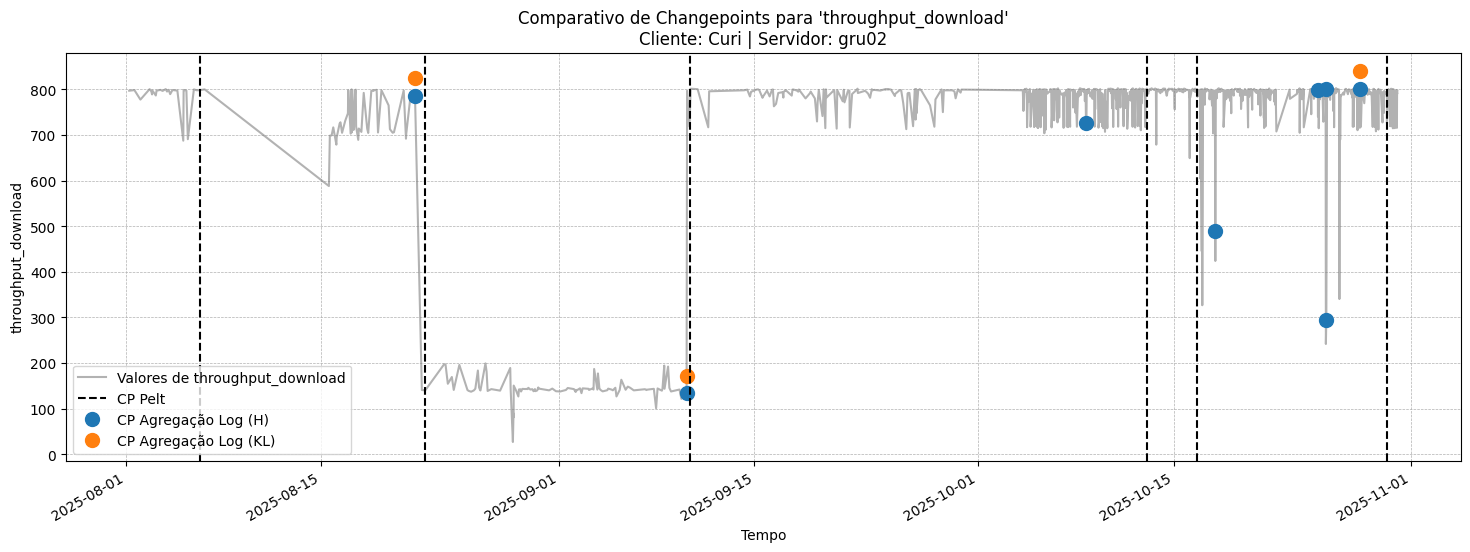

Figura salva em: imgs_comparativo\COMP_LandTeste_gru02_throughput_download.png


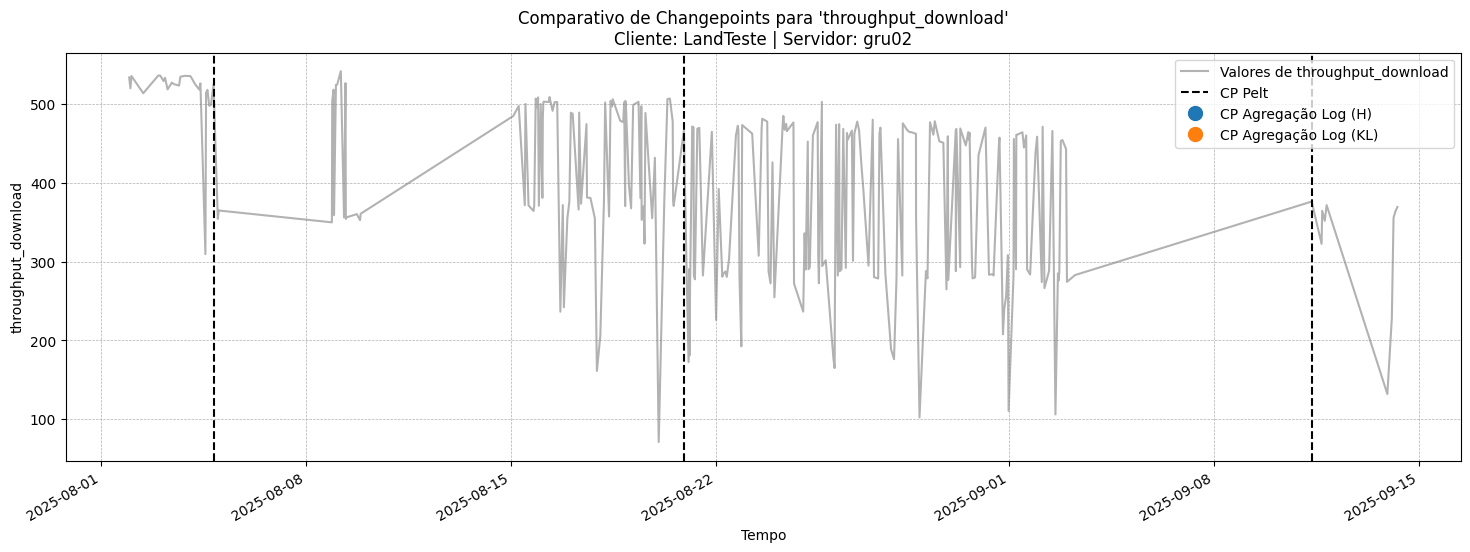

Figura salva em: imgs_comparativo\COMP_Gigalink-CPS_gru03_throughput_download.png


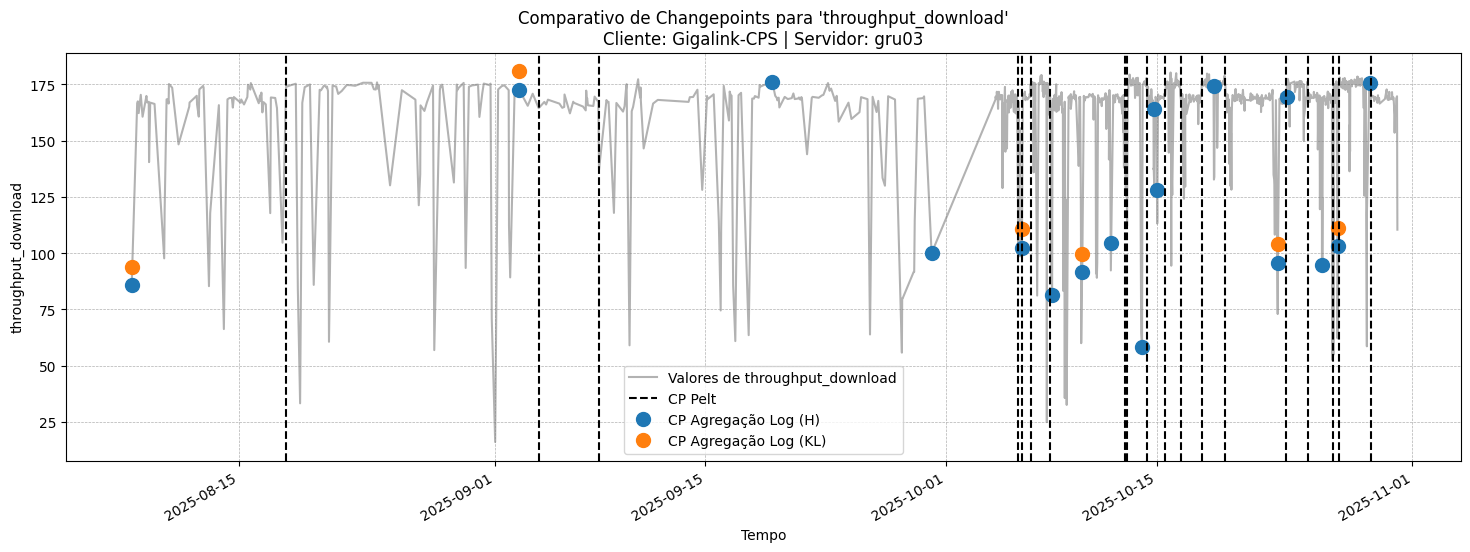

Figura salva em: imgs_comparativo\COMP_Gigalink-ARBU_gru02_throughput_download.png


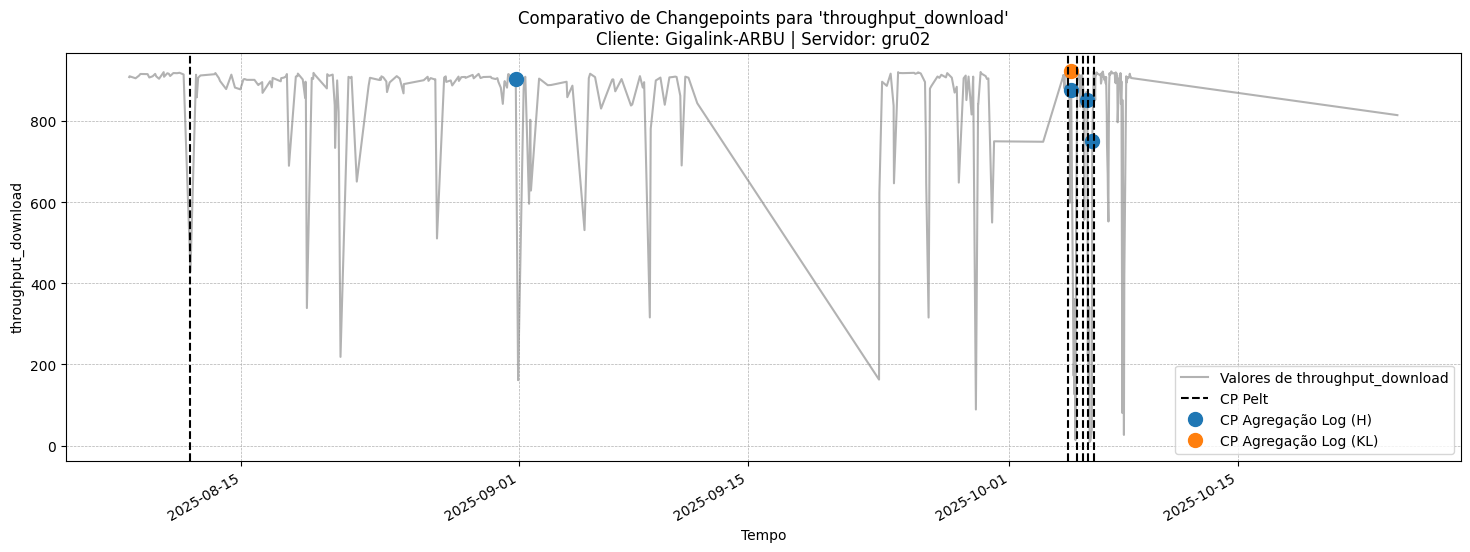

Figura salva em: imgs_comparativo\COMP_Gigalink-TER_gru02_throughput_download.png


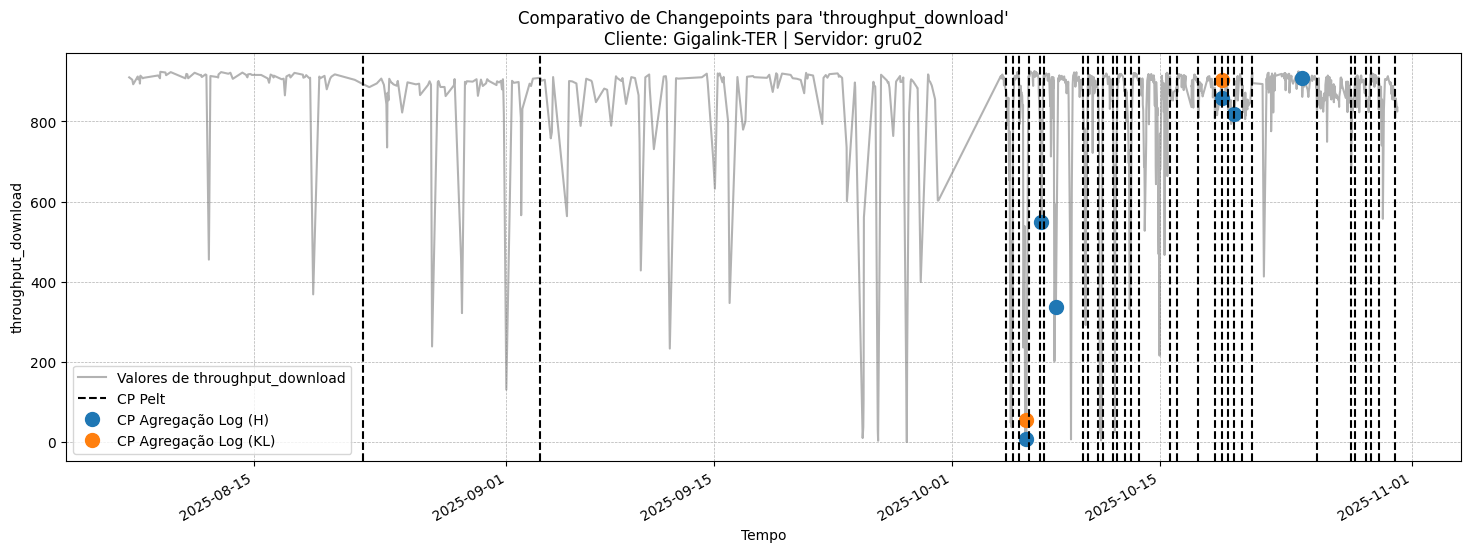

Figura salva em: imgs_comparativo\COMP_Gigalink-LUMA_gru02_throughput_download.png


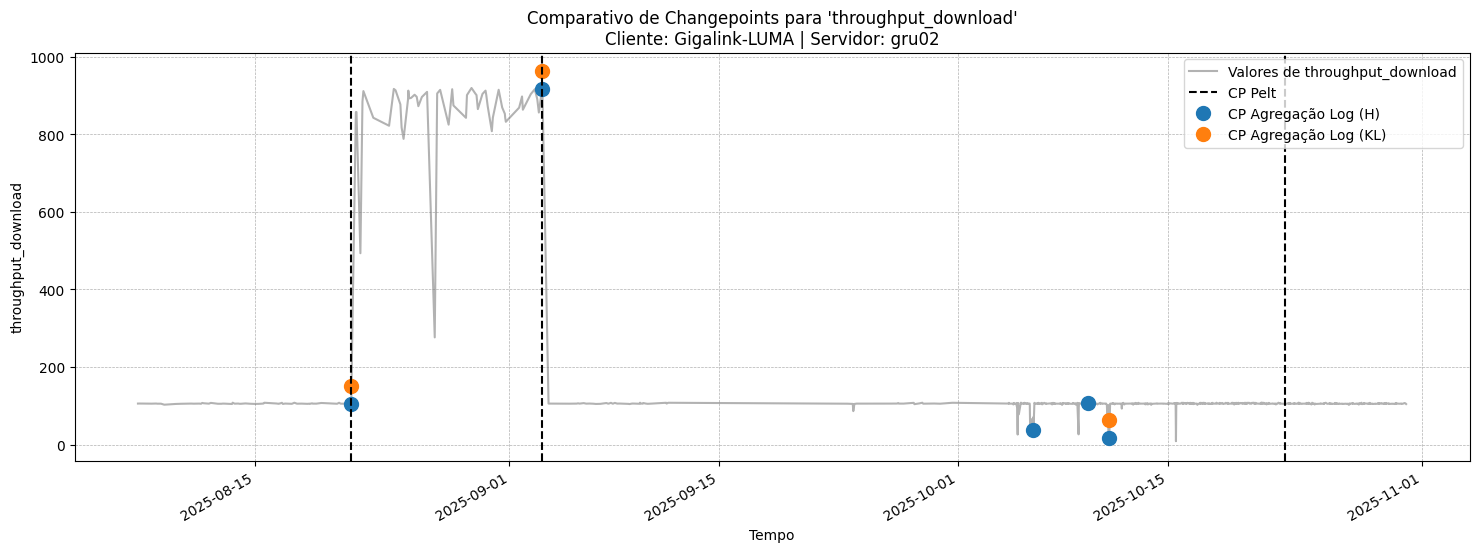

Figura salva em: imgs_comparativo\COMP_Curi_RNP-SP_throughput_download.png


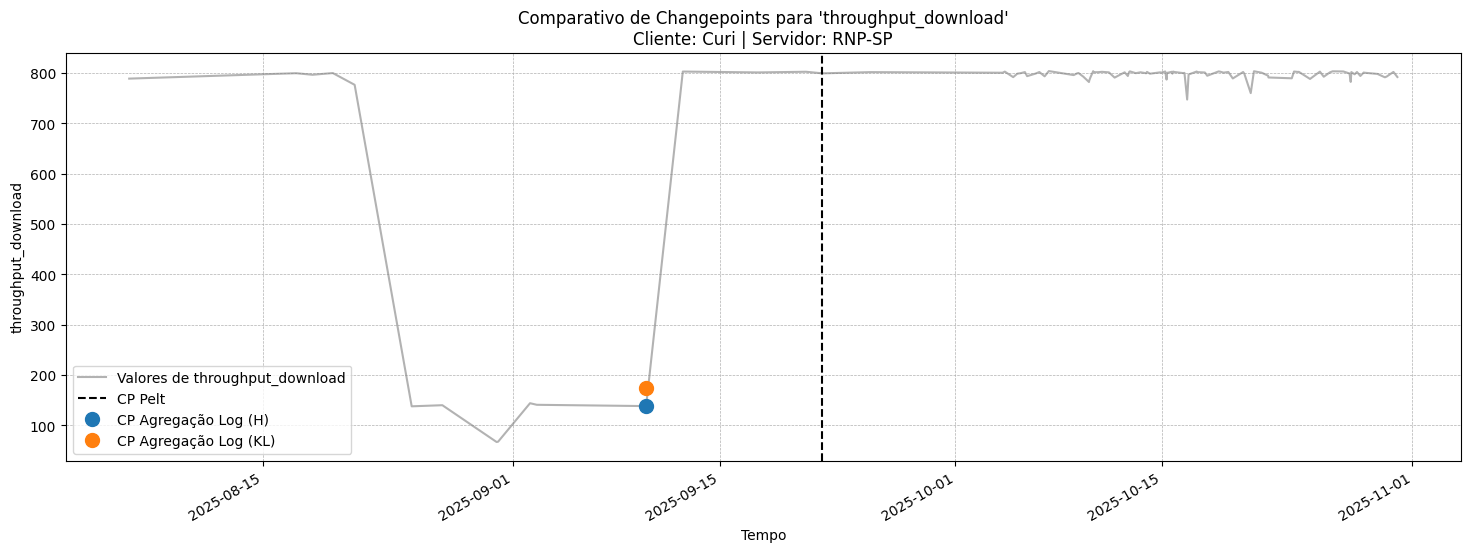

Figura salva em: imgs_comparativo\COMP_Miguel_gru03_throughput_download.png


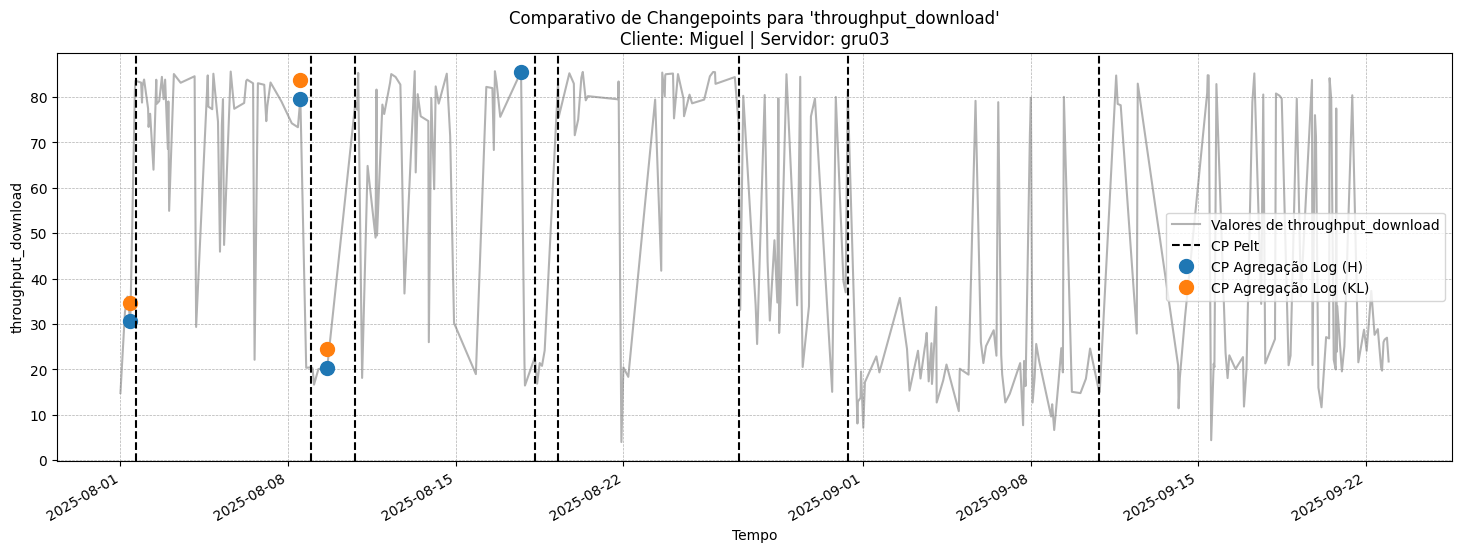

Figura salva em: imgs_comparativo\COMP_Gigalink-TER_RNP-MG_throughput_download.png


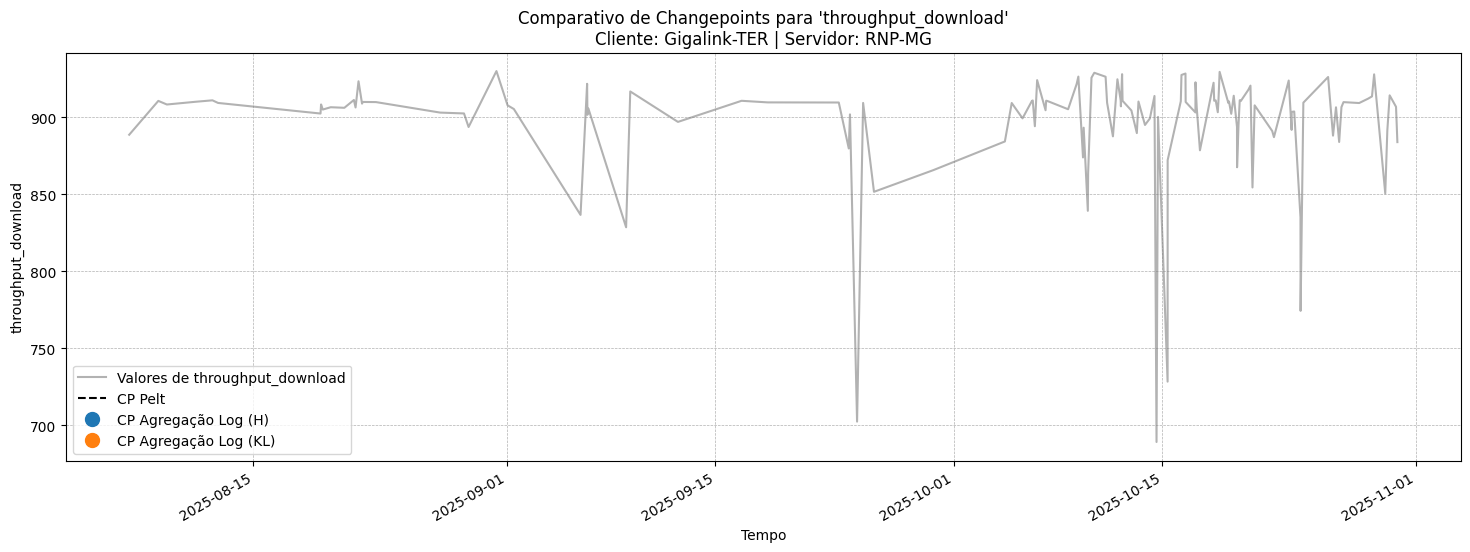

Figura salva em: imgs_comparativo\COMP_Gigalink-LUMA_RNP-RJ_throughput_download.png


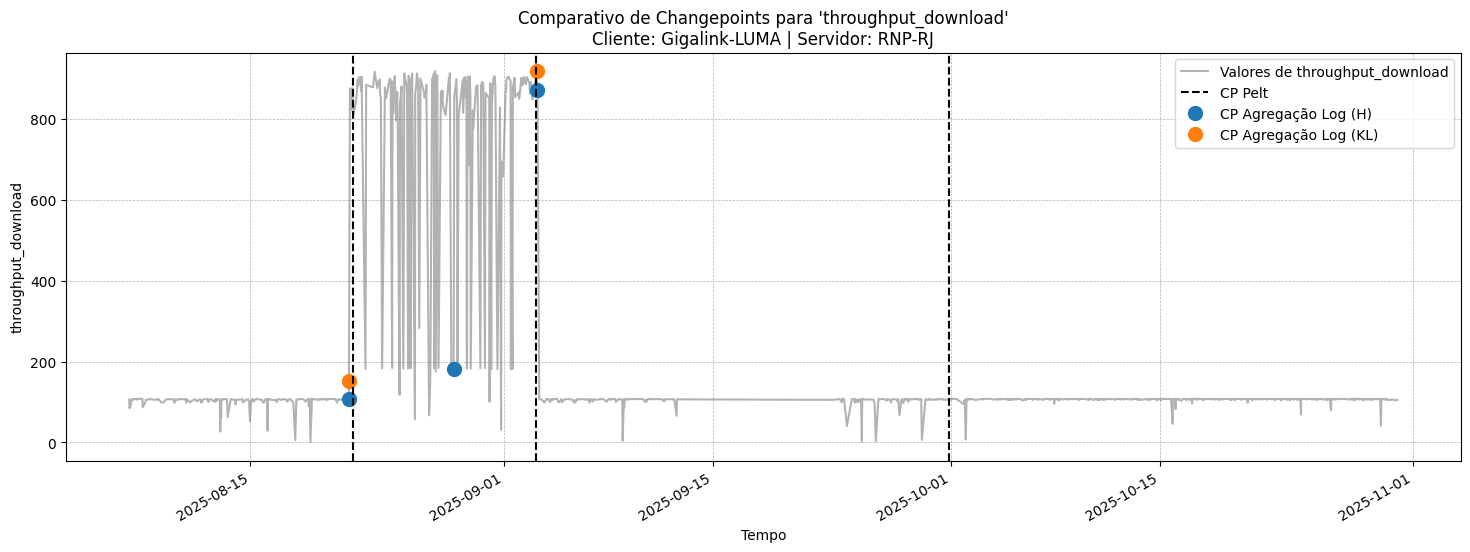

Figura salva em: imgs_comparativo\COMP_Gigalink-QUI_gru03_throughput_download.png


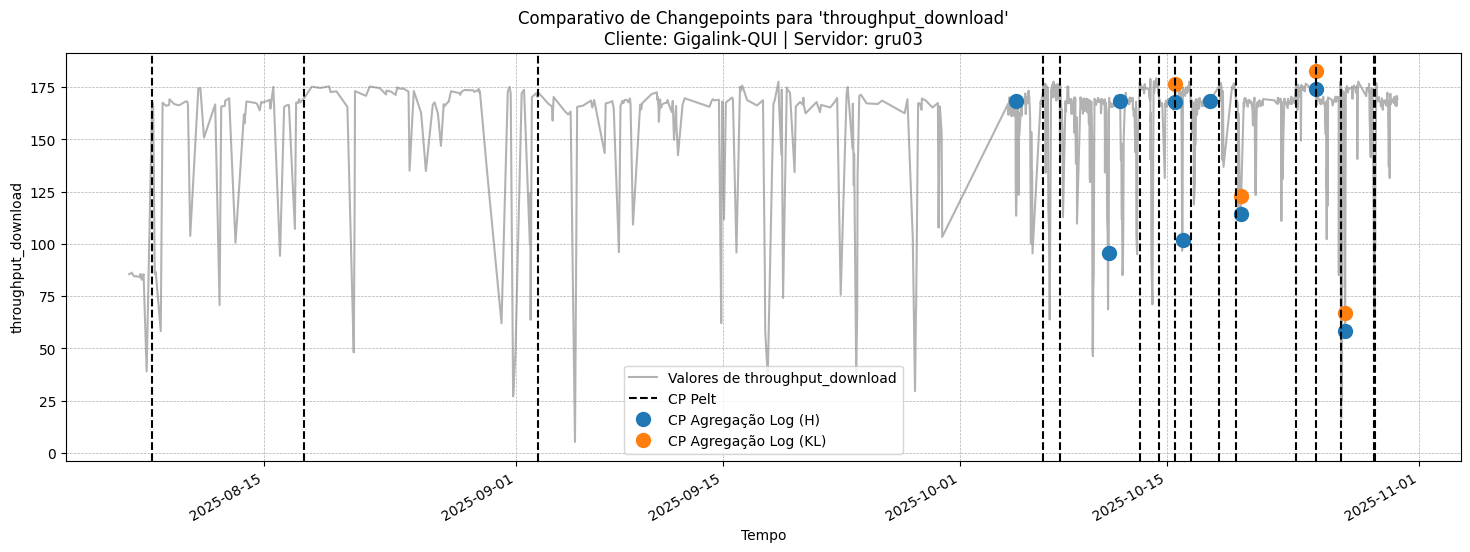

Figura salva em: imgs_comparativo\COMP_Curi_google-cloud-SP_throughput_download.png


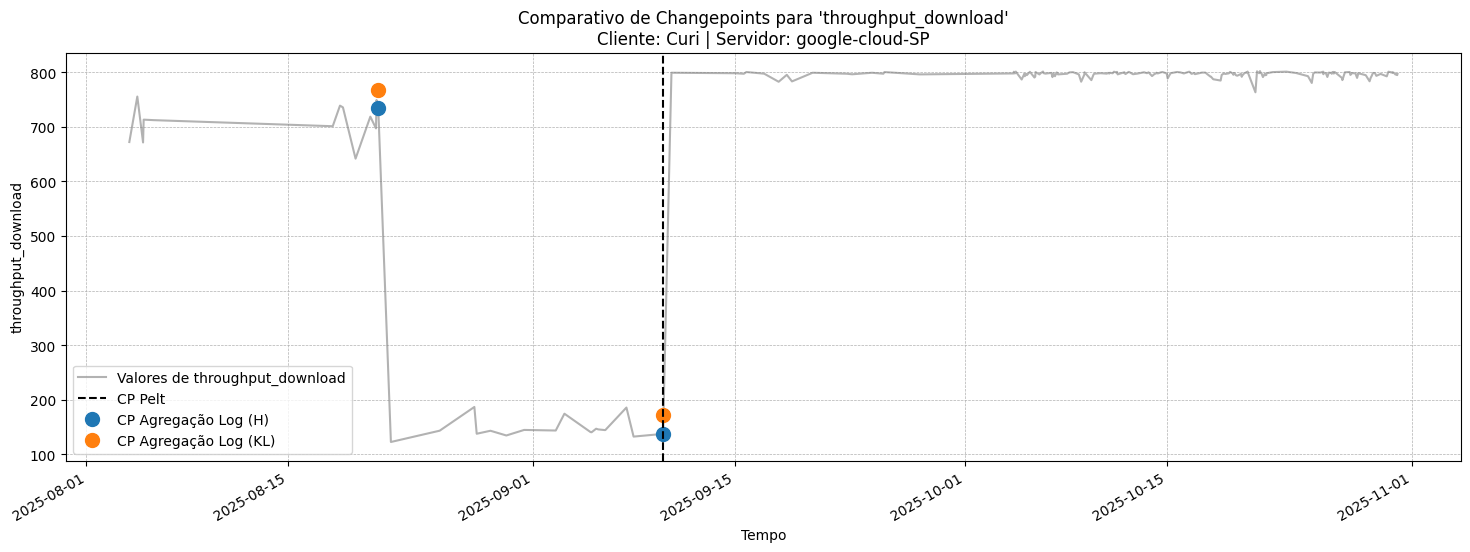

Figura salva em: imgs_comparativo\COMP_Theo_RNP-SP_throughput_download.png


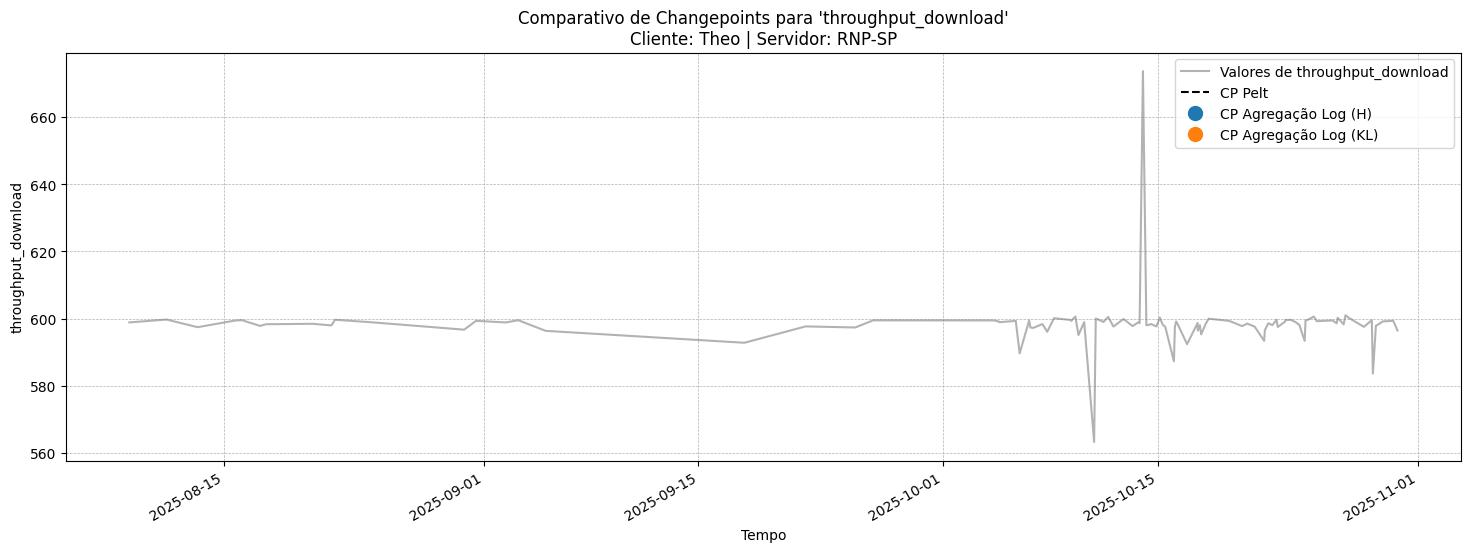

In [9]:
DIRS_PARA_COMPARAR = {
    'Agregação Log (H)': 'changepoints/logaritmica_H',
    'Agregação Log (KL)': 'changepoints/logaritmica_KL',
    'Pelt': 'changepoints/pelt'
}

VARIABLES = ['throughput_download']

pares = selecionar_arquivos_aleatorios('changepoints/logaritmica_H', 20)

# exclui as imagens antigas na pasta imgs_comparativo
import os
diretorio = 'imgs_comparativo'
for arquivo in os.listdir(diretorio):
    os.remove(os.path.join(diretorio, arquivo))

for client, server in pares:
    plot_changepoint_comparison(
        source_dirs=DIRS_PARA_COMPARAR,
        client=client,
        server=server,
        variables=VARIABLES,
        save_fig=True
    )

# renomeia as imagens salvas em imgs_comparativo para cps_comp_1, cps_comp_2, ...
diretorio = 'imgs_comparativo'
arquivos = os.listdir(diretorio)
for i, arquivo in enumerate(arquivos):
    extensao = arquivo.split('.')[-1]
    novo_nome = f'cps_comp_{i+1}.{extensao}'
    os.rename(os.path.join(diretorio, arquivo), os.path.join(diretorio, novo_nome))